# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

* The second viable drug regimen to reduce tumor growth after Capomulin is Ramicane
* The study shows that druring a 40 days treatment with Capomulin on a mouse (id=l509) a peek tumor volume happens around day 20 and the gets to the min around day 35
* The distribution of female vs male mice on this study is almost the same: 49.4% vs 50.6%. Male population is  slightly larger.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
measured_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
measured_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groupby = measured_data['Drug Regimen'].groupby

mean_regimen = round(measured_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2)

median_regimen = round(measured_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2)

variance_regimen = round(measured_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2)

std_regimen =  round(measured_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2)

sem_regimen =  round(measured_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2)

summary_table = pd.DataFrame({"Tumor Volume (mm3)(Mean)":mean_regimen , 
                               "Tumor Volume (mm3)(median)":median_regimen,
                               "Tumor Volume (mm3)(variance)":variance_regimen,
                               "Tumor Volume (mm3)(STD)":std_regimen,
                                "Tumor Volume (mm3)(SEM)":sem_regimen})

summary_table

,Tumor Volume (mm3)(Mean),Tumor Volume (mm3)(median),Tumor Volume (mm3)(variance),Tumor Volume (mm3)(STD),Tumor Volume (mm3)(SEM)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

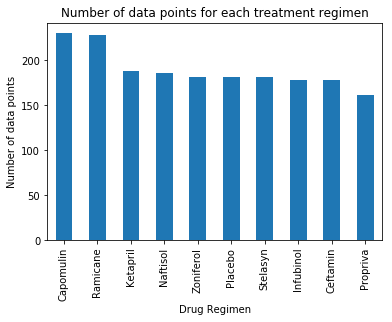

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_counts = measured_data['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind="bar" ,figsize=(6,4))

plt.title("Number of data points for each treatment regime")
plt.title("Number of data points for each treatment regimen")
plt.ylabel("Number of data points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

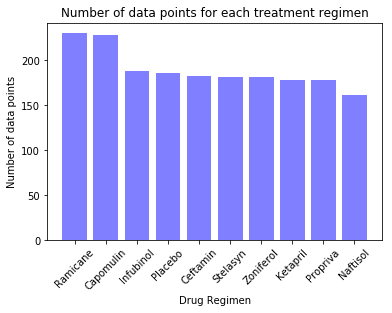

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(measured_data['Drug Regimen'].unique()))

tick_locations = [value for value in x_axis]

regimen_num = measured_data['Drug Regimen'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(x_axis,regimen_num, color='b', alpha=0.5)
plt.xticks(tick_locations,measured_data['Drug Regimen'].unique(),rotation=45)
plt.title("Number of data points for each treatment regimen")
plt.ylabel("Number of data points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

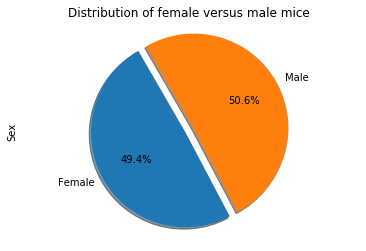

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = measured_data.groupby(['Sex']).count()['Tumor Volume (mm3)']
gender_list = gender_dis.keys()

explode = (0.1,0)
gender_pie = gender_dis.plot(kind="pie",autopct="%1.1f%%", y=gender_list, startangle=120, explode=explode ,shadow=True, 
                                                     title="Distribution of female versus male mice")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

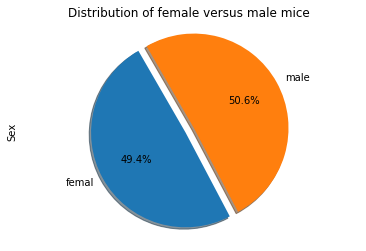

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels for femal and male
labels=['femal','male']
plt.pie(gender_dis, explode=explode, autopct="%1.1f%%", labels=labels, shadow=True, startangle=120)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse. 
max_tumor = measured_data.groupby(["Mouse ID"]).max()
max_tumor.head()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(measured_data,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [10]:
# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# for capomulin
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']

cap_quartiles = round(capomulin.quantile([.25,.5,.75]),2)
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = round(cap_upperq-cap_lowerq,2)
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"The lower quartile of occupancy is: {cap_lowerq}")
print(f"The upper quartile of occupancy is: {cap_upperq}")
print(f"The interquartile range of occupancy is: {cap_iqr}")
print(f"The the median of occupancy is: {cap_quartiles[0.5]} ")

lower_bound = cap_lowerq - (1.5*cap_iqr)
upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"\nCapomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The the median of occupancy is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# for ramicane
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']

ram_quartiles = round(ramicane.quantile([.25,.5,.75]),2)
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = round(ram_upperq-ram_lowerq,2)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"The lower quartile of occupancy is: {ram_lowerq}")
print(f"The upper quartile of occupancy is: {ram_upperq}")
print(f"The interquartile range of occupancy is: {ram_iqr}")
print(f"The the median of occupancy is: {ram_quartiles[0.5]} ")

lower_bound = ram_lowerq - (1.5*ram_iqr)
upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"\nRamicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

The lower quartile of occupancy is: 31.56
The upper quartile of occupancy is: 40.66
The interquartile range of occupancy is: 9.1
The the median of occupancy is: 36.56 
Values below 17.91 could be outliers.
Values above 54.309999999999995 could be outliers.

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [12]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# for infubinol
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']

inf_quartiles = round(infubinol.quantile([.25,.5,.75]),2)
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = round(inf_upperq-inf_lowerq,2)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"The lower quartile of occupancy is: {inf_lowerq}")
print(f"The upper quartile of occupancy is: {inf_upperq}")
print(f"The interquartile range of occupancy is: {inf_iqr}")
print(f"The the median of occupancy is: {inf_quartiles[0.5]} ")

lower_bound = inf_lowerq - (1.5*inf_iqr)
upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"\nRamicane potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol >inf_upper_bound)]}")


The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The the median of occupancy is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

Ramicane potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [13]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

cef_quartiles = round(ceftamin.quantile([.25,.5,.75]),2)
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = round(cef_upperq-cef_lowerq,2)
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"The lower quartile of occupancy is: {cef_lowerq}")
print(f"The upper quartile of occupancy is: {cef_upperq}")
print(f"The interquartile range of occupancy is: {cef_iqr}")
print(f"The the median of occupancy is: {cef_quartiles[0.5]} ")

lower_bound = cef_lowerq - (1.5*cef_iqr)
upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"\nCeftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin >cef_upper_bound)]}")


The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 64.3
The interquartile range of occupancy is: 15.58
The the median of occupancy is: 59.85 
Values below 25.349999999999998 could be outliers.
Values above 87.67 could be outliers.

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


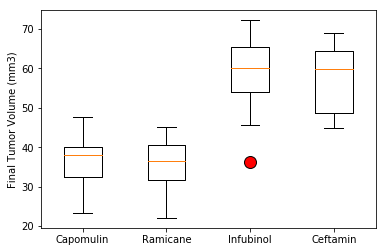

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

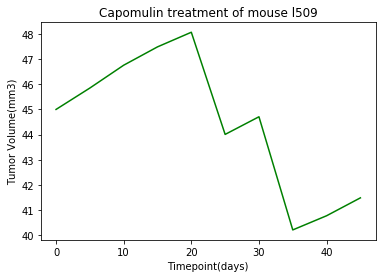

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = measured_data[measured_data['Drug Regimen'] == 'Capomulin']
time_tumor_id = capomulin_data[['Tumor Volume (mm3)','Timepoint','Mouse ID']]
mouse_id = "l509"
one_mouse_id = time_tumor_id.loc[time_tumor_id["Mouse ID"]== mouse_id]
y_values = one_mouse_id['Tumor Volume (mm3)']
x_values = one_mouse_id['Timepoint']
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume(mm3)')
plt.plot(x_values,y_values, color="green" )
plt.show()


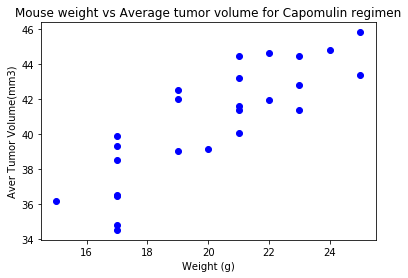

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = measured_data[measured_data['Drug Regimen'] == 'Capomulin']
weight_tumorAVG = capomulin_data[['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
weight_tumorAVG_grouped = weight_tumorAVG.groupby('Mouse ID')
tumor_avg_info = weight_tumorAVG_grouped['Tumor Volume (mm3)'].mean()
weight_info = weight_tumorAVG_grouped['Weight (g)'].first()

plt.title('Mouse weight vs Average tumor volume for Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Aver Tumor Volume(mm3)')
plt.scatter(weight_info, tumor_avg_info, marker="o", color="blue")
plt.show()

## Correlation and Regression

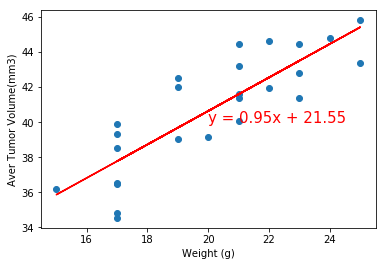

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#for the Capomulin regimen
capomulin_data = measured_data[measured_data['Drug Regimen'] == 'Capomulin']
weight_tumorAVG = capomulin_data[['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
weight_tumorAVG_grouped = weight_tumorAVG.groupby('Mouse ID')
y_values = weight_tumorAVG_grouped['Tumor Volume (mm3)'].mean()
x_values = weight_tumorAVG_grouped['Weight (g)'].first()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,40), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Aver Tumor Volume(mm3)')
plt.show()